# LightGBM API Demonstration

This notebook demonstrates the usage of custom utility functions built for real-time Bitcoin price analysis using the LightGBM framework.It leverages historical price data from the CoinGecko API, performs time-series feature engineering, and trains a regression model to forecast future prices.
## Notebook Objectives
This notebook focuses on:

* Fetching historical Bitcoin prices from the CoinGecko API

* Creating lag-based and time-based features

* Training a LightGBM regression model

* Evaluating prediction performance using standard metrics

* Visualizing actual vs. predicted Bitcoin prices

## References
* CoinGecko API Docs: https://www.coingecko.com/en/api

* LightGBM Documentation: https://lightgbm.readthedocs.io/

* scikit-learn Docs: https://scikit-learn.org/stable/documentation.html

## Citations
CoinGecko. (2024). CoinGecko API v3. Retrieved from https://www.coingecko.com/en/api/documentation

# 1. Setup and Imports

In [86]:

from LightGBM_utils import (
    fetch_bitcoin_data,
    create_features,
    train_lightgbm,
    evaluate_model,
    plot_predictions
)

## 2. Fetch Bitcoin Price Data

In [62]:
df = fetch_bitcoin_data(days=200)
df.head()

,timestamp,price
0,2024-10-15,66049.994927
1,2024-10-16,66962.219945
2,2024-10-17,67647.544148
3,2024-10-18,67328.105270
4,2024-10-19,68465.619207


## 3. Feature Engineering

In [64]:
df_feat = create_features(df)
df_feat.head()

,timestamp,price,minute,hour,dayofweek,lag_1,lag_2,rolling_mean_3,rolling_std_3
2,2024-10-17,67647.544148,0,0,3,66962.219945,66049.994927,66886.586340,801.455682
3,2024-10-18,67328.105270,0,0,4,67647.544148,66962.219945,67312.623121,342.924319
4,2024-10-19,68465.619207,0,0,5,67328.105270,67647.544148,67813.756208,586.689292
5,2024-10-20,68388.871290,0,0,6,68465.619207,67328.105270,68060.865255,635.747952
6,2024-10-21,68962.829180,0,0,0,68388.871290,68465.619207,68605.773226,311.591522


## 4. Train LightGBM Model

In [66]:
model, X_test, y_test = train_lightgbm(df_feat)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 5
[LightGBM] [Info] Start training from score 90976.632469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

##  5. Evaluate Model

In [68]:
rmse, mae, y_true, y_pred = evaluate_model(model, X_test, y_test)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 2120.47
MAE: 1428.64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 6. Visualize Predictions

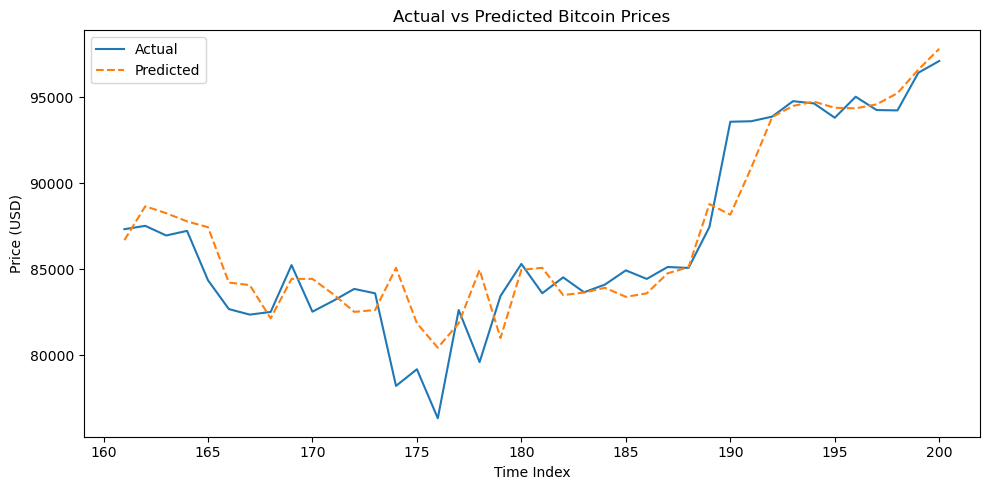

In [70]:
plot_predictions(y_true, y_pred)

## Summary

This notebook encapsulates a simple, modular way to fetch real-time Bitcoin data and apply machine learning for short-term forecasting using LightGBM.

- Modular utilities make it easy to scale and adapt.
- Encourages a clean separation between logic and application.